# NLP Lab Task — Preprocessing to Deployment with Twitter Sentiment Dataset

## Overview

This lab takes students through the **entire NLP pipeline** using a **Twitter Sentiment Analysis dataset** (tweets labeled as positive, negative, or neutral). Students will preprocess the data, represent it using multiple methods, train classical machine learning models, evaluate their results, and finally build a small API for deployment.

---

## Learning Objectives

* Apply text preprocessing (regex, case folding, tokenization, stopword removal, punctuation handling).
* Compare stemming and lemmatization, and use POS tagging to analyze counts of nouns, verbs, and adjectives.
* Build text representations using **Bag-of-Words**, **TF–IDF**, and **Word2Vec**.
* Train classical ML models inside an sklearn **Pipeline**.
* Evaluate models with standard metrics and perform basic error analysis.
* Save a trained pipeline and build a simple API to serve predictions.

---

## Dataset

We will use the **Sentiment140 Twitter dataset** (1.6M tweets, labeled positive/negative). For simplicity, you can work with a smaller balanced subset (e.g., 10k–20k tweets). This dataset is widely used for sentiment analysis and contains real, noisy text with mentions, hashtags, and emoticons.

Dataset link: [Sentiment140](http://help.sentiment140.com/for-students/)

---

## Step-by-Step Tasks

### 1) Exploratory Data Analysis (EDA)

* Load dataset, show class distribution, tweet length histogram, and a few sample tweets.
* Deliverable: 3 plots (class balance, length histogram, top frequent tokens) + 5 example tweets.

### 2) Regex Cleaning

* Remove URLs, mentions (@user), hashtags, emojis (or replace with tokens), and extra whitespace.
* Show a before-and-after example for at least 3 tweets.

### 3) Case Folding & Tokenization

* Convert all text to lowercase.
* Tokenize tweets using NLTK or spaCy.
* Compare vocabulary size before and after cleaning.

### 4) Stopwords, Punctuation, and Numbers

* Remove stopwords (with NLTK list, customizable).
* Decide how to handle punctuation and numbers (remove or replace with `<NUM>`).
* Deliverable: short explanation of your choice.

### 5) Stemming vs Lemmatization

* Use PorterStemmer (stemming) and spaCy lemmatizer.
* Show 20 sample words with their stem vs lemma.
* Train quick models with both and compare results.

### 6) POS Tagging (extra features)

* Use spaCy to count nouns, verbs, and adjectives per tweet.
* Add these counts as additional numeric features.
* Compare model with vs without POS features.

### 7) Text Representation

* Implement three representations:
  1. **Bag-of-Words** (CountVectorizer)
  2. **TF–IDF** (TfidfVectorizer)
  3. **Word2Vec** (pretrained embeddings, averaged per tweet)
* Compare vocabulary sizes and representation dimensions.

### 8) Modeling with Pipelines

* Use sklearn Pipelines to connect preprocessing + vectorizer + classifier.
* Models to try:
  * Multinomial Naive Bayes (for BoW/TF–IDF)
  * Logistic Regression
  * Linear SVM
* Deliverable: comparison table (accuracy, F1-score).

### 9) Evaluation & Error Analysis

* Use held-out test set.
* Metrics: accuracy, precision, recall, F1, confusion matrix.
* Show 10 misclassified tweets and discuss why they may be difficult.

### 10) Save Model Pipeline

* Save the best pipeline using `joblib` or `pickle`.
* Deliverable: `sentiment_model.pkl` file.

### 11) Build a Simple API (Deployment Step)

* Create a small Flask API with one endpoint `/predict` that accepts a tweet as input and returns sentiment prediction.
* The API should load the saved pipeline and make predictions.
* Deliverable: `app.py` with Flask code + test with a sample curl or Postman request.

---

## Deliverables

1. Jupyter Notebook with step-by-step tasks, results, and code.
2. Comparison tables for preprocessing choices and representations.
3. Saved pipeline file (`.pkl`).
4. Flask API script (`app.py`).
5. Short report in markdown cell summarizing preprocessing, modeling choices, and results.

---

This streamlined lab ensures students get hands-on experience with **real-world text preprocessing, classical modeling, and deployment of NLP systems**.


### 1. Load the Dataset

We will use the **Sentiment140 Twitter Sentiment dataset**.  
It contains 1.6 million tweets labeled as positive (4) or negative (0).  
For this lab, we will load a smaller subset (e.g., 20,000 rows) for faster experimentation.

```python
import pandas as pd

# Column order for Sentiment140 dataset:
# 0 - target (0 = negative, 4 = positive)
# 1 - ids
# 2 - date
# 3 - flag
# 4 - user
# 5 - text (tweet)

# Update the file path if needed
file_path = "sentiment140.csv"

# Load with proper encoding
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign column names
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map target labels: 0 → negative, 4 → positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Take a smaller sample for experiments (optional)
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Quick check
print(df.shape)
df.head()


In [2]:
import pandas as pd

import pandas as pd
import zipfile
import os
import requests

# Step 1: Download the dataset (if not already downloaded)
url = "https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"
zip_path = "trainingandtestdata.zip"

if not os.path.exists(zip_path):
    print("Downloading dataset...")
    r = requests.get(url)
    with open(zip_path, "wb") as f:
        f.write(r.content)

# Step 2: Unzip the file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(".")

# Step 3: Load training data
file_path = "training.1600000.processed.noemoticon.csv"

df = pd.read_csv(file_path, encoding="latin-1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map sentiment labels: 0 = negative, 4 = positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Optional: sample a smaller dataset for quicker experiments
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Preview the data
print(df.shape)
df.head()


# Load training set
train_path = "training.1600000.processed.noemoticon.csv"
train_df = pd.read_csv(train_path, encoding="latin-1", header=None)
train_df.columns = ["target", "id", "date", "flag", "user", "text"]
train_df["target"] = train_df["target"].map({0: "negative", 4: "positive"})

print("Training set:", train_df.shape)
print(train_df.head())

# Load manual test set
test_path = "testdata.manual.2009.06.14.csv"
test_df = pd.read_csv(test_path, encoding="latin-1", header=None)
test_df.columns = ["target", "id", "date", "flag", "user", "text"]

# This test set has labels 0 (negative), 2 (neutral), 4 (positive)
test_df["target"] = test_df["target"].map({0: "negative", 2: "neutral", 4: "positive"})

print("Test set:", test_df.shape)
print(test_df.head())


(20000, 6)
Training set: (1600000, 6)
     target          id                          date      flag  \
0  negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3  negative  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4  negative  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
Test set: (498, 6)
     target  id                          date     flag      user  \
0  positive   3  Mon May 11 03:17:40 UTC

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  20000 non-null  object
 1   id      20000 non-null  int64 
 2   date    20000 non-null  object
 3   flag    20000 non-null  object
 4   user    20000 non-null  object
 5   text    20000 non-null  object
dtypes: int64(1), object(5)
memory usage: 937.6+ KB


In [4]:
df.shape

(20000, 6)

In [5]:
df

,target,id,date,flag,user,text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem
...,...,...,...,...,...,...
19995,positive,1981517014,Sun May 31 09:19:12 PDT 2009,NO_QUERY,gemmaridlington,Loving the weather Although we're not having ...
19996,negative,2245469775,Fri Jun 19 16:10:38 PDT 2009,NO_QUERY,musicroxmysockz,Me and andrea r. last day of school..... http...
19997,positive,2063022808,Sun Jun 07 01:05:46 PDT 2009,NO_QUERY,ElaineToni,Just finished watching Your Song Presents: Boy...
19998,positive,1982082859,Sun May 31 10:29:36 PDT 2009,NO_QUERY,lindseyrd20,@janfran813 awww i can't wait to get one


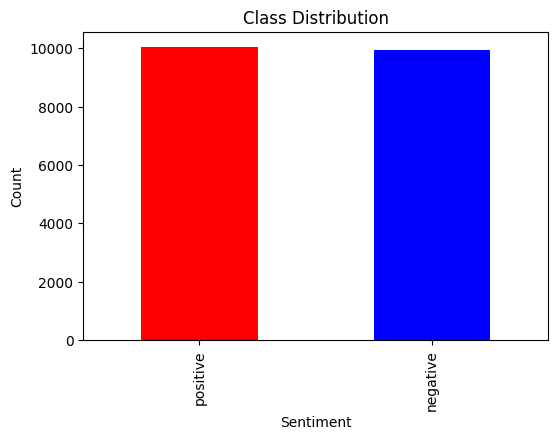

In [6]:
import matplotlib.pyplot as plt


class_counts = df["target"].value_counts()

plt.figure(figsize=(6,4))
class_counts.plot(kind="bar", color=["red", "blue"])
plt.title("Class Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

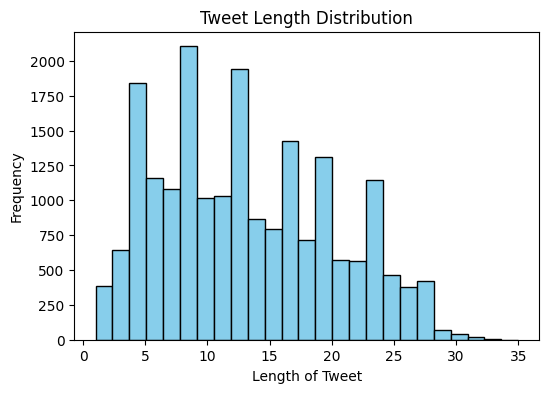

In [7]:
tweet_lengths = df["text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(6,4))
plt.hist(tweet_lengths, bins=25, color="skyblue", edgecolor="black")
plt.title("Tweet Length Distribution")
plt.xlabel("Length of Tweet")
plt.ylabel("Frequency")
plt.show()


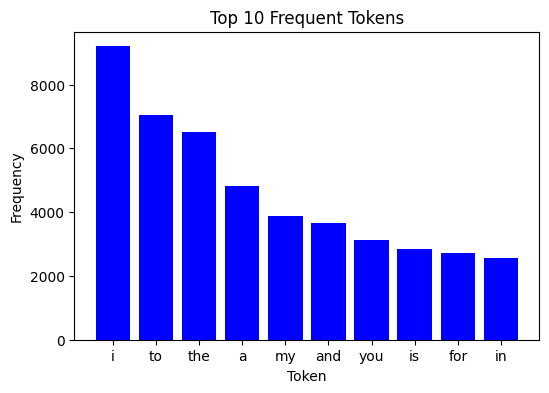

In [8]:
from collections import Counter

all_tokens = []

for text in df["text"]:   
    tokens = text.lower().split()
    all_tokens.extend(tokens)

token = Counter(all_tokens)
top_10_tokens = token.most_common(10)

tokens, counts = zip(*top_10_tokens)

plt.figure(figsize=(6,4))
plt.bar(tokens, counts, color="blue")
plt.title("Top 10 Frequent Tokens")
plt.xlabel("Token")
plt.ylabel("Frequency")
plt.show()


In [9]:
print(df[["text"]].sample(5, random_state=42).reset_index(drop = True))

                                                text
0  cpr fail day, i turned it off instead of shock...
1  Laying in the bed because I just found out I'v...
2  GRUMPY FUCK. i hate when people take there wee...
3  @lolstephy pls just shutup about splendour n d...
4  @chrisoldroyd Only UK? What about N. America  ...


In [10]:
import re

cleaned_text = []

for text in df["text"]:
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+","",text)
    text = re.sub(r"#\w+","",text)
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    cleaned_text.append(text)

df["clean_text"] = cleaned_text


for i in range(3):
    print("Before:", df.loc[i, "text"])
    print("After: ", df.loc[i, "clean_text"])
    print()

Before: @chrishasboobs AHHH I HOPE YOUR OK!!! 
After:  AHHH I HOPE YOUR OK

Before: @misstoriblack cool , i have no tweet apps  for my razr 2
After:  cool i have no tweet apps for my razr 2

Before: @TiannaChaos i know  just family drama. its lame.hey next time u hang out with kim n u guys like have a sleepover or whatever, ill call u
After:  i know just family drama its lamehey next time u hang out with kim n u guys like have a sleepover or whatever ill call u



In [11]:
df

,target,id,date,flag,user,text,clean_text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,AHHH I HOPE YOUR OK
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...",cool i have no tweet apps for my razr 2
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,i know just family drama its lamehey next time...
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,School email wont open and I have geography st...
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,upper airways problem
...,...,...,...,...,...,...,...
19995,positive,1981517014,Sun May 31 09:19:12 PDT 2009,NO_QUERY,gemmaridlington,Loving the weather Although we're not having ...,Loving the weather Although were not having a ...
19996,negative,2245469775,Fri Jun 19 16:10:38 PDT 2009,NO_QUERY,musicroxmysockz,Me and andrea r. last day of school..... http...,Me and andrea r last day of school
19997,positive,2063022808,Sun Jun 07 01:05:46 PDT 2009,NO_QUERY,ElaineToni,Just finished watching Your Song Presents: Boy...,Just finished watching Your Song Presents Boys...
19998,positive,1982082859,Sun May 31 10:29:36 PDT 2009,NO_QUERY,lindseyrd20,@janfran813 awww i can't wait to get one,awww i cant wait to get one


In [12]:
!pip install spacy

  Using cached numpy-2.3.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.3.3-cp312-cp312-win_amd64.whl (12.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.3 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 2.3.3 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.3 which is incompatible.


In [13]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 3.4 MB/s eta 0:00:04
     ---- ----------------------------------- 1.3/12.8 MB 4.0 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.8 MB 3.8 MB/s eta 0:00:03
     --------- ------------------------------ 2.9/12.8 MB 3.9 MB/s eta 0:00:03
     ----------- ---------------------------- 3.7/12.8 MB 3.9 MB/s eta 0:00:03
     ------------- -------------------------- 4.5/12.8 MB 3.9 MB/s eta 0:00:03
     ---------------- ----------------------- 5.2/12.8 MB 3.9 MB/s eta 0:00:02
     ------------------ --------------------- 6.0/12.8 MB 3.9 MB/s eta 0:00:02
     --------------------- ------------------ 6.8/12.8 MB 3.8 MB/s eta 0:00:02
     ----------------------- ---------------- 7.6/12.8 MB 3.9 MB/s eta 0:00:02
     -------------------------- ------------- 8.4/12.8 MB 3.9 MB/s eta 0:00:02
     ---------------------------- ----------- 9.2/12.8 MB 3

In [14]:
import spacy

nlp = spacy.load("en_core_web_sm")

df["clean_text"] = df["clean_text"].str.lower()

df["clean_text"] = df["clean_text"].apply(lambda x: [token.text for token in nlp(x)])

print("Before:", df.loc[0, "text"])
print("cleaned:", df.loc[0, "clean_text"])


Before: @chrishasboobs AHHH I HOPE YOUR OK!!! 
cleaned: ['ahhh', 'i', 'hope', 'your', 'ok']


In [15]:
df

,target,id,date,flag,user,text,clean_text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,"[ahhh, i, hope, your, ok]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...","[cool, i, have, no, tweet, apps, for, my, razr..."
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,"[i, know, just, family, drama, its, lamehey, n..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,"[school, email, wo, nt, open, and, i, have, ge..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,"[upper, airways, problem]"
...,...,...,...,...,...,...,...
19995,positive,1981517014,Sun May 31 09:19:12 PDT 2009,NO_QUERY,gemmaridlington,Loving the weather Although we're not having ...,"[loving, the, weather, although, were, not, ha..."
19996,negative,2245469775,Fri Jun 19 16:10:38 PDT 2009,NO_QUERY,musicroxmysockz,Me and andrea r. last day of school..... http...,"[me, and, andrea, r, last, day, of, school]"
19997,positive,2063022808,Sun Jun 07 01:05:46 PDT 2009,NO_QUERY,ElaineToni,Just finished watching Your Song Presents: Boy...,"[just, finished, watching, your, song, present..."
19998,positive,1982082859,Sun May 31 10:29:36 PDT 2009,NO_QUERY,lindseyrd20,@janfran813 awww i can't wait to get one,"[awww, i, ca, nt, wait, to, get, one]"


In [16]:
vocab_before = set(" ".join(df["text"]).split())
print("Vocabulary size before cleaning:", len(vocab_before))

all_tokens_after = [token for tokens in df["clean_text"] for token in tokens]
vocab_after = set(all_tokens_after)
print("Vocabulary size after cleaning:", len(vocab_after))


Vocabulary size before cleaning: 51042
Vocabulary size after cleaning: 23468


In [17]:
!pip install nltk


In [18]:
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

df["clean_text"] = df["clean_text"].apply(lambda tokens: [w for w in tokens if w not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raneem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
df

,target,id,date,flag,user,text,clean_text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,"[ahhh, hope, ok]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...","[cool, tweet, apps, razr, 2]"
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,"[know, family, drama, lamehey, next, time, u, ..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,"[school, email, wo, nt, open, geography, stuff..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,"[upper, airways, problem]"
...,...,...,...,...,...,...,...
19995,positive,1981517014,Sun May 31 09:19:12 PDT 2009,NO_QUERY,gemmaridlington,Loving the weather Although we're not having ...,"[loving, weather, although, bbq, evening, appa..."
19996,negative,2245469775,Fri Jun 19 16:10:38 PDT 2009,NO_QUERY,musicroxmysockz,Me and andrea r. last day of school..... http...,"[andrea, r, last, day, school]"
19997,positive,2063022808,Sun Jun 07 01:05:46 PDT 2009,NO_QUERY,ElaineToni,Just finished watching Your Song Presents: Boy...,"[finished, watching, song, presents, boystown]"
19998,positive,1982082859,Sun May 31 10:29:36 PDT 2009,NO_QUERY,lindseyrd20,@janfran813 awww i can't wait to get one,"[awww, ca, nt, wait, get, one]"


In [20]:
import string
punctuations = set(string.punctuation)

df["clean_text"] = df["clean_text"].apply(lambda tokens: [t for t in tokens if t not in punctuations])


In [21]:
df["clean_text"] = df["clean_text"].apply(lambda tokens: ["<NUM>" if t.isdigit() else t for t in tokens])


In [22]:
df['clean_text']

0                                         [ahhh, hope, ok]
1                         [cool, tweet, apps, razr, <NUM>]
2        [know, family, drama, lamehey, next, time, u, ...
3        [school, email, wo, nt, open, geography, stuff...
4                                [upper, airways, problem]
                               ...                        
19995    [loving, weather, although, bbq, evening, appa...
19996                       [andrea, r, last, day, school]
19997       [finished, watching, song, presents, boystown]
19998                       [awww, ca, nt, wait, get, one]
19999    [indeed, rather, large, hoarder, paper, amp, w...
Name: clean_text, Length: 20000, dtype: object

I chose to remove stopwords using the NLTK list because they don’t add important meaning to the text. For punctuation, I decided to delete it since it’s not useful for the classification task. For numbers, I replaced them with <NUM> to keep the information that a number exists without needing its exact value.

In [23]:
df

,target,id,date,flag,user,text,clean_text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,"[ahhh, hope, ok]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...","[cool, tweet, apps, razr, <NUM>]"
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,"[know, family, drama, lamehey, next, time, u, ..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,"[school, email, wo, nt, open, geography, stuff..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,"[upper, airways, problem]"
...,...,...,...,...,...,...,...
19995,positive,1981517014,Sun May 31 09:19:12 PDT 2009,NO_QUERY,gemmaridlington,Loving the weather Although we're not having ...,"[loving, weather, although, bbq, evening, appa..."
19996,negative,2245469775,Fri Jun 19 16:10:38 PDT 2009,NO_QUERY,musicroxmysockz,Me and andrea r. last day of school..... http...,"[andrea, r, last, day, school]"
19997,positive,2063022808,Sun Jun 07 01:05:46 PDT 2009,NO_QUERY,ElaineToni,Just finished watching Your Song Presents: Boy...,"[finished, watching, song, presents, boystown]"
19998,positive,1982082859,Sun May 31 10:29:36 PDT 2009,NO_QUERY,lindseyrd20,@janfran813 awww i can't wait to get one,"[awww, ca, nt, wait, get, one]"


In [24]:
print(type(df.loc[0, "clean_text"]))


<class 'list'>


In [25]:
import nltk
from nltk.stem import PorterStemmer
import spacy


stemmer = PorterStemmer()
nlp = spacy.load("en_core_web_sm")

df["stemmed"] = df["clean_text"].apply(lambda tokens: [stemmer.stem(w) for w in tokens])
df["lemmatized"] = df["clean_text"].apply(lambda tokens: [token.lemma_ for token in nlp(" ".join(tokens))])


for i in range(2):
    print("Original :", df.loc[i, "clean_text"])
    print("Stemmed  :", df.loc[i, "stemmed"])
    print("Lemma    :", df.loc[i, "lemmatized"])
    


Original : ['ahhh', 'hope', 'ok']
Stemmed  : ['ahhh', 'hope', 'ok']
Lemma    : ['ahhh', 'hope', 'ok']
Original : ['cool', 'tweet', 'apps', 'razr', '<NUM>']
Stemmed  : ['cool', 'tweet', 'app', 'razr', '<num>']
Lemma    : ['cool', 'tweet', 'app', 'razr', '<', 'NUM', '>']


In [26]:
df

,target,id,date,flag,user,text,clean_text,stemmed,lemmatized
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,"[ahhh, hope, ok]","[ahhh, hope, ok]","[ahhh, hope, ok]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...","[cool, tweet, apps, razr, <NUM>]","[cool, tweet, app, razr, <num>]","[cool, tweet, app, razr, <, NUM, >]"
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,"[know, family, drama, lamehey, next, time, u, ...","[know, famili, drama, lamehey, next, time, u, ...","[know, family, drama, lamehey, next, time, u, ..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,"[school, email, wo, nt, open, geography, stuff...","[school, email, wo, nt, open, geographi, stuff...","[school, email, will, not, open, geography, st..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,"[upper, airways, problem]","[upper, airway, problem]","[upper, airway, problem]"
...,...,...,...,...,...,...,...,...,...
19995,positive,1981517014,Sun May 31 09:19:12 PDT 2009,NO_QUERY,gemmaridlington,Loving the weather Although we're not having ...,"[loving, weather, although, bbq, evening, appa...","[love, weather, although, bbq, even, appar, <n...","[love, weather, although, bbq, evening, appare..."
19996,negative,2245469775,Fri Jun 19 16:10:38 PDT 2009,NO_QUERY,musicroxmysockz,Me and andrea r. last day of school..... http...,"[andrea, r, last, day, school]","[andrea, r, last, day, school]","[andrea, r, last, day, school]"
19997,positive,2063022808,Sun Jun 07 01:05:46 PDT 2009,NO_QUERY,ElaineToni,Just finished watching Your Song Presents: Boy...,"[finished, watching, song, presents, boystown]","[finish, watch, song, present, boystown]","[finish, watch, song, present, boystown]"
19998,positive,1982082859,Sun May 31 10:29:36 PDT 2009,NO_QUERY,lindseyrd20,@janfran813 awww i can't wait to get one,"[awww, ca, nt, wait, get, one]","[awww, ca, nt, wait, get, one]","[awww, can, not, wait, get, one]"


In [27]:
df

,target,id,date,flag,user,text,clean_text,stemmed,lemmatized
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,"[ahhh, hope, ok]","[ahhh, hope, ok]","[ahhh, hope, ok]"
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...","[cool, tweet, apps, razr, <NUM>]","[cool, tweet, app, razr, <num>]","[cool, tweet, app, razr, <, NUM, >]"
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,"[know, family, drama, lamehey, next, time, u, ...","[know, famili, drama, lamehey, next, time, u, ...","[know, family, drama, lamehey, next, time, u, ..."
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,"[school, email, wo, nt, open, geography, stuff...","[school, email, wo, nt, open, geographi, stuff...","[school, email, will, not, open, geography, st..."
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,"[upper, airways, problem]","[upper, airway, problem]","[upper, airway, problem]"
...,...,...,...,...,...,...,...,...,...
19995,positive,1981517014,Sun May 31 09:19:12 PDT 2009,NO_QUERY,gemmaridlington,Loving the weather Although we're not having ...,"[loving, weather, although, bbq, evening, appa...","[love, weather, although, bbq, even, appar, <n...","[love, weather, although, bbq, evening, appare..."
19996,negative,2245469775,Fri Jun 19 16:10:38 PDT 2009,NO_QUERY,musicroxmysockz,Me and andrea r. last day of school..... http...,"[andrea, r, last, day, school]","[andrea, r, last, day, school]","[andrea, r, last, day, school]"
19997,positive,2063022808,Sun Jun 07 01:05:46 PDT 2009,NO_QUERY,ElaineToni,Just finished watching Your Song Presents: Boy...,"[finished, watching, song, presents, boystown]","[finish, watch, song, present, boystown]","[finish, watch, song, present, boystown]"
19998,positive,1982082859,Sun May 31 10:29:36 PDT 2009,NO_QUERY,lindseyrd20,@janfran813 awww i can't wait to get one,"[awww, ca, nt, wait, get, one]","[awww, ca, nt, wait, get, one]","[awww, can, not, wait, get, one]"


In [28]:
from sklearn.model_selection import train_test_split
stemmed_texts = df['stemmed'].apply(lambda x: ' '.join(x))
lemmatized_texts = df['lemmatized'].apply(lambda x: ' '.join(x))
y = df['target']  

train_idx, test_idx = train_test_split(df.index, test_size=0.2, random_state=42, stratify=y)

X_train_s = stemmed_texts.loc[train_idx].reset_index(drop=True)
X_test_s  = stemmed_texts.loc[test_idx].reset_index(drop=True)

X_train_l = lemmatized_texts.loc[train_idx].reset_index(drop=True)
X_test_l  = lemmatized_texts.loc[test_idx].reset_index(drop=True)

y_train = y.loc[train_idx].reset_index(drop=True)
y_test  = y.loc[test_idx].reset_index(drop=True)


In [29]:
from sklearn.feature_extraction.text import CountVectorizer
 
vec = CountVectorizer()

X_train_vec = vec.fit_transform(X_train_s)

X_test_vec = vec.transform(X_test_s)

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

clf = MultinomialNB()

clf.fit(X_train_vec, y_train)

preds = clf.predict(X_test_vec)

print(classification_report(y_test, preds))


              precision    recall  f1-score   support

    negative       0.72      0.76      0.74      1988
    positive       0.75      0.71      0.73      2012

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



In [31]:
vec = CountVectorizer()

X_train_vec = vec.fit_transform(X_train_l)

X_test_vec = vec.transform(X_test_l)

In [32]:
clf = MultinomialNB()

clf.fit(X_train_vec, y_train)

preds = clf.predict(X_test_vec)

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

    negative       0.71      0.76      0.74      1988
    positive       0.75      0.70      0.72      2012

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



In [33]:
nlp = spacy.load("en_core_web_sm", disable=["ner"])

def count_pos(tokens):
    text = " ".join(tokens) if isinstance(tokens, list) else str(tokens)
    doc = nlp(text)
    nouns = sum(1 for token in doc if token.pos_ == "NOUN")
    verbs = sum(1 for token in doc if token.pos_ == "VERB")
    adjs  = sum(1 for token in doc if token.pos_ == "ADJ")
    return pd.Series([nouns, verbs, adjs])

df[["nouns", "verbs", "adjs"]] = df["lemmatized"].apply(count_pos)




In [34]:
df

,target,id,date,flag,user,text,clean_text,stemmed,lemmatized,nouns,verbs,adjs
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!,"[ahhh, hope, ok]","[ahhh, hope, ok]","[ahhh, hope, ok]",1,0,0
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo...","[cool, tweet, apps, razr, <NUM>]","[cool, tweet, app, razr, <num>]","[cool, tweet, app, razr, <, NUM, >]",0,1,1
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...,"[know, family, drama, lamehey, next, time, u, ...","[know, famili, drama, lamehey, next, time, u, ...","[know, family, drama, lamehey, next, time, u, ...",7,2,2
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...,"[school, email, wo, nt, open, geography, stuff...","[school, email, wo, nt, open, geographi, stuff...","[school, email, will, not, open, geography, st...",5,2,1
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem,"[upper, airways, problem]","[upper, airway, problem]","[upper, airway, problem]",2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,positive,1981517014,Sun May 31 09:19:12 PDT 2009,NO_QUERY,gemmaridlington,Loving the weather Although we're not having ...,"[loving, weather, although, bbq, evening, appa...","[love, weather, although, bbq, even, appar, <n...","[love, weather, although, bbq, evening, appare...",4,0,1
19996,negative,2245469775,Fri Jun 19 16:10:38 PDT 2009,NO_QUERY,musicroxmysockz,Me and andrea r. last day of school..... http...,"[andrea, r, last, day, school]","[andrea, r, last, day, school]","[andrea, r, last, day, school]",2,0,1
19997,positive,2063022808,Sun Jun 07 01:05:46 PDT 2009,NO_QUERY,ElaineToni,Just finished watching Your Song Presents: Boy...,"[finished, watching, song, presents, boystown]","[finish, watch, song, present, boystown]","[finish, watch, song, present, boystown]",2,1,1
19998,positive,1982082859,Sun May 31 10:29:36 PDT 2009,NO_QUERY,lindseyrd20,@janfran813 awww i can't wait to get one,"[awww, ca, nt, wait, get, one]","[awww, ca, nt, wait, get, one]","[awww, can, not, wait, get, one]",0,2,0


In [35]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from scipy.sparse import hstack


df["text_joined"] = df["lemmatized"].apply(lambda x: " ".join(x))
X = df["text_joined"]
y = df["target"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


clf1 = MultinomialNB()
clf1.fit(X_train_vec, y_train)
y_pred1 = clf1.predict(X_test_vec)

print("Model WITHOUT POS features:")
print(classification_report(y_test, y_pred1))


pos_features_train = df.loc[X_train.index, ["nouns", "verbs", "adjs"]].values
pos_features_test = df.loc[X_test.index, ["nouns", "verbs", "adjs"]].values


X_train_combined = hstack([X_train_vec, pos_features_train])
X_test_combined = hstack([X_test_vec, pos_features_test])

clf2 = MultinomialNB()
clf2.fit(X_train_combined, y_train)
y_pred2 = clf2.predict(X_test_combined)

print("Model WITH POS features:")
print(classification_report(y_test, y_pred2))


Model WITHOUT POS features:
              precision    recall  f1-score   support

    negative       0.71      0.76      0.74      1988
    positive       0.75      0.70      0.72      2012

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000

Model WITH POS features:
              precision    recall  f1-score   support

    negative       0.72      0.76      0.74      1988
    positive       0.75      0.70      0.72      2012

    accuracy                           0.73      4000
   macro avg       0.73      0.73      0.73      4000
weighted avg       0.73      0.73      0.73      4000



In [36]:
!pip install gensim


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.3
    Uninstalling numpy-2.3.3:
      Successfully uninstalled numpy-2.3.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [37]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

count_vec = CountVectorizer()
X_v = count_vec.fit_transform(df["text_joined"])

print("Bag-of-Words")
print("Vocabulary size:", len(count_vec.vocabulary_))
print("Representation shape:", X_v.shape)


Bag-of-Words
Vocabulary size: 20451
Representation shape: (20000, 20451)


In [38]:
tfidf_vec = TfidfVectorizer()
X_tfidf = tfidf_vec.fit_transform(df["text_joined"])

print("TF-IDF")
print("Vocabulary size:", len(tfidf_vec.vocabulary_))   
print("Shape:", X_tfidf.shape)          

TF-IDF
Vocabulary size: 20451
Shape: (20000, 20451)


In [39]:
from gensim.models import KeyedVectors


model = KeyedVectors.load_word2vec_format(r"C:\Users\Raneem\Downloads\wiki.simple.vec", binary=False)


print("fastText loaded!")
print("Embedding dimension:", model.vector_size)


fastText loaded!
Embedding dimension: 300


In [40]:
import numpy as np

def avg_word2vec(tokens, model):
    vectors = [model[w] for w in tokens if w in model]
    if len(vectors) == 0:  
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)


X_w2v = np.vstack(df["lemmatized"].apply(lambda x: avg_word2vec(x, model)))

print("Shape (tweets × dim):", X_w2v.shape)


Shape (tweets × dim): (20000, 300)


In [41]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score


X = df["text_joined"]      
y = df["target"]            
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


pipelines = {"BoW + NaiveBayes": Pipeline([("vect", CountVectorizer()),("clf", MultinomialNB())]),
            "TFIDF + NaiveBayes": Pipeline([("vect", TfidfVectorizer()),("clf", MultinomialNB())]),
            "BoW + LogisticRegression": Pipeline([("vect", CountVectorizer()),("clf", LogisticRegression(max_iter=1000))]),
            "TFIDF + LogisticRegression": Pipeline([("vect", TfidfVectorizer()),("clf", LogisticRegression(max_iter=1000))]),
            "BoW + LinearSVM": Pipeline([("vect", CountVectorizer()),("clf", LinearSVC())]),
            "TFIDF + LinearSVM": Pipeline([("vect", TfidfVectorizer()),("clf", LinearSVC())])}


results = []
for name, pipe in pipelines.items():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average="weighted")
    results.append([name, acc, f1])


results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1-score"])
print(results_df)


                        Model  Accuracy  F1-score
0            BoW + NaiveBayes   0.72875  0.728615
1          TFIDF + NaiveBayes   0.72600  0.725912
2    BoW + LogisticRegression   0.73325  0.733093
3  TFIDF + LogisticRegression   0.73975  0.739603
4             BoW + LinearSVM   0.71725  0.717171
5           TFIDF + LinearSVM   0.71625  0.716205



Classification Report:
              precision    recall  f1-score   support

    negative       0.75      0.72      0.73      1987
    positive       0.73      0.76      0.75      2013

    accuracy                           0.74      4000
   macro avg       0.74      0.74      0.74      4000
weighted avg       0.74      0.74      0.74      4000



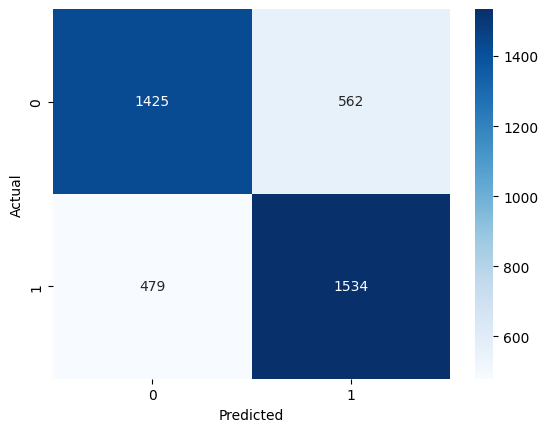

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


best = pipelines["TFIDF + LogisticRegression"]
best.fit(X_train, y_train)

y_pred = best.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [43]:

misclassified = np.where(y_pred != y_test)[0]

print("\n10 Misclassified Tweets")
for i in misclassified[:10]:
    print("Tweet:", df.iloc[X_test.index[i]]["clean_text"])   
    print("True:", y_test.iloc[i])
    print("Predicted:", y_pred[i])
   



10 Misclassified Tweets
Tweet: ['added', 'new', 'zodiac', 'sign', 'wanna', 'scorpio', 'forever']
True: negative
Predicted: positive
Tweet: ['ooh', 'ie8', 'looks', 'kinda', 'flasher', '<NUM>', 'seem', 'fair', 'bit', 'quicker', 'still', 'gon', 'na', 'stick', 'ff']
True: positive
Predicted: negative
Tweet: ['oku', 'work', 'gon', 'na', 'check', 'vampires', 'news']
True: positive
Predicted: negative
Tweet: ['craving', 'macha', 'chocolate', 'cake']
True: negative
Predicted: positive
Tweet: []
True: negative
Predicted: positive
Tweet: ['gmorning', 'twitts', 'ready', 'wknd', 'first', 'work', 'tgif']
True: negative
Predicted: positive
Tweet: ['zaru', 'soba', 'cold', 'buckwheat', 'noodles', 'yummy', 'dipping', 'sauce', 'anddd', 'bento', 'box', 'japanese', 'lunch', 'box', 'love', 'food']
True: negative
Predicted: positive
Tweet: ['going', 'swimming', 'cause', 'pool', 'sooo', 'amazingly', 'warm']
True: positive
Predicted: negative
Tweet: ['ca', 'nt', 'believe', 'kenny', 'nt', 'said', 'word', 'yet

Some common mistakes in misclassified tweets:

Positive words in negative tweets (lovely, forever).

Technical terms confused the model.

Context issues (craving food seen as positive).

Empty tweets after cleaning caused wrong predictions.

Sarcasm not understood by the model.

In [44]:
import joblib

best_model = pipelines["TFIDF + LogisticRegression"]
best_model.fit(X_train, y_train)

joblib.dump(best_model, "sentiment_model.pkl")
print("Model saved as sentiment_model.pkl")

Model saved as sentiment_model.pkl


In [45]:
!pip install flask


In [ ]:
from flask import Flask, request, jsonify
import joblib
import threading


model = joblib.load("sentiment_model.pkl")
app = Flask(__name__)

@app.route("/predict", methods=["POST"])
def predict():
    try:
        data = request.get_json(force=True)
        tweet = data.get("tweet", "")

        if not tweet:
            return jsonify({"error": "No tweet provided"}), 400

        prediction = model.predict([tweet])[0]

        return jsonify({
            "tweet": tweet,
            "prediction": str(prediction)
        })
    except Exception as e:
        return jsonify({"error": str(e)}), 500



def run_app():
    app.run(debug=False, use_reloader=False)

thread = threading.Thread(target=run_app)
thread.start()


 * Serving Flask app '__main__'


 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [03/Oct/2025 01:22:16] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [03/Oct/2025 01:30:16] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [03/Oct/2025 01:30:16] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [03/Oct/2025 01:33:01] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [03/Oct/2025 01:33:40] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [03/Oct/2025 01:34:39] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [03/Oct/2025 01:34:47] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [03/Oct/2025 01:35:48] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [03/Oct/2025 01:39:17] "GET / HTTP/1.1" 404 -


In [47]:
!pip install ipywidgets

In [ ]:
import requests
import ipywidgets as widgets
from IPython.display import display

text = widgets.Text(value='',placeholder='enter tweets',description='Tweet:',disabled=False)
out = widgets.Output()
display(text, out)

def send_request(change):
    tweet = text.value
    with out:
        out.clear_output()
        if tweet.strip() == "":
            print("please enter the sentence")
            return
        try:
            response = requests.post("http://127.0.0.1:5000/predict",
                                     json={"tweet": tweet})
            print("tweet:", tweet)
            print("result:", response.json())
        except Exception as e:
            print("Error:", e)

text.on_submit(send_request)



Text(value='', description='Tweet:', placeholder='enter tweets')

Output()

C:\Users\Raneem\AppData\Local\Temp\ipykernel_27204\4216506009.py:24: DeprecationWarning: on_submit is deprecated. Instead, set the .continuous_update attribute to False and observe the value changing with: mywidget.observe(callback, 'value').
  text.on_submit(send_request)
